### 練習類別

In [1]:
# class Entity:

#     def __init__(self, x, y):
#         self.x = x
#         self.y = y
#         print("初始化x:{0},y:{1}".format(x, y))

#     def __call__(self, x, y):
#         self.x, self.y = x, y
#         print("修改后x:{0},y:{1}".format(x, y))


In [2]:
# a = Entity(8, 10)
# b = Entity(20, 21)


In [3]:
# a = Entity(8, 10)
# a = a(4, 5)  # 实例可以像函数那样执行，并传入x y值，修改对象的x y

In [4]:
# Entity(8, 10)

### 練習Tensor

In [5]:
# import torch

# def stop_operator(B, r):
#     return torch.clamp(B, -r, r)

# # 範例
# B = torch.tensor([-2.0, -1.0, 0.0, 1.0, 2.0])  # 輸入信號
# r = 1.0  # 操作子的閾值

# output = stop_operator(B, r)
# print("輸入:", B.numpy())
# print("輸出:", output.numpy())


In [6]:
# X = torch.tensor([2.0, -0.5, -3.0])
# a = torch.ones_like(X)
# ans = torch.max(-a, torch.min(a, X))

# print("輸入:", a.numpy())
# print("輸出:", ans.numpy())

### 計算各 Material 平均值以及標準差

In [7]:
# import numpy as np
# import pandas as pd

# def load_dataset(
#         Material="Material E",
#         in_file1_template="./Data/Training/{Material}/B_Field.csv",
#         in_file2_template="./Data/Training/{Material}/Frequency.csv",
#         in_file3_template="./Data/Training/{Material}/Temperature.csv",
#         in_file4_template="./Data/Training/{Material}/H_Field.csv",
#         in_file5_template="./Data/Training/{Material}/Volumetric_Loss.csv"):
#     """
#     Load dataset files and calculate mean and standard deviation for each parameter.
#     Includes special processing for dB/dt from B_Field.

#     Parameters:
#     ---------
#     Material : str
#         Name of the material to load data for.
#     in_file*_template : str
#         Template paths to dataset files.

#     Returns:
#     ---------
#     norms_dict : dict
#         Dictionary containing mean and standard deviation for each parameter.
#     """
#     # Generate file paths
#     in_file1 = in_file1_template.format(Material=Material)
#     in_file2 = in_file2_template.format(Material=Material)
#     in_file3 = in_file3_template.format(Material=Material)
#     in_file4 = in_file4_template.format(Material=Material)
#     in_file5 = in_file5_template.format(Material=Material)

#     # Load data
#     B_data = pd.read_csv(in_file1, header=None).to_numpy()  # N x 1024
#     F_data = pd.read_csv(in_file2, header=None).to_numpy()  # N x 1
#     T_data = pd.read_csv(in_file3, header=None).to_numpy()  # N x 1
#     H_data = pd.read_csv(in_file4, header=None).to_numpy()  # N x 1024
#     P_data = pd.read_csv(in_file5, header=None).to_numpy()  # N x 1

#     # Apply log transformation
#     log_F_data = np.log10(F_data)  # 對頻率取對數
#     log_P_data = np.log10(P_data)  # 對損耗密度取對數

#     # Data preprocessing
#     seq_length = 128
#     cols = range(0, 1024, int(1024 / seq_length))
#     data_B = B_data[:, cols]  # Down-sample to 128 points
#     n_init = 16
#     data_length = seq_length + n_init
#     data_B = np.hstack(
#         (data_B, data_B[:, :n_init]
#          ))  # Add extra points for initial magnetization calculation

#     # Calculate dB/dt with frequency influence
#     dB = np.diff(data_B, axis=1)
#     dB = np.concatenate((dB[:, 0:1], dB),
#                         axis=1)  # Pad the first column to match dimensions
#     dB_dt = dB * (seq_length * log_F_data.reshape(-1, 1))

#     # Calculate mean and standard deviation
#     mean_B, std_B = np.mean(B_data), np.std(B_data)
#     mean_H, std_H = np.mean(H_data), np.std(H_data)
#     mean_T, std_T = np.mean(T_data), np.std(T_data)

#     mean_log_F, std_log_F = np.mean(log_F_data), np.std(log_F_data)
#     mean_log_P, std_log_P = np.mean(log_P_data), np.std(log_P_data)

#     mean_dB_dt, std_dB_dt = np.mean(dB_dt), np.std(dB_dt)

#     # Update norms_dict to include log-transformed data
#     norms_dict = {
#         "B_Field": [mean_B, std_B],
#         "H_Field": [mean_H, std_H],
#         # "Frequency": [mean_F, std_F],
#         "Log_Frequency": [mean_log_F, std_log_F],  # 新增對數頻率
#         "Temperature": [mean_T, std_T],
#         "dB/dt": [mean_dB_dt, std_dB_dt],
#         # "Volumetric_Loss": [mean_P, std_P],
#         "Log_Volumetric_Loss": [mean_log_P, std_log_P]  # 新增對數損耗密度
#     }

#     # # Store results in a dictionary
#     # norms_dict = {
#     #     "B_Field": [mean_B, std_B],
#     #     "H_Field": [mean_H, std_H],
#     #     "Frequency": [mean_F, std_F],
#     #     "Temperature": [mean_T, std_T],
#     #     "dB/dt": [mean_dB_dt, std_dB_dt],
#     #     "Volumetric_Loss": [mean_P, std_P]
#     # }

#     return norms_dict

# # Example usage
# if __name__ == "__main__":
#     for Material in [
#             "Material A", "Material B", "Material C", "Material D",
#             "Material E"
#     ]:
#         print(f"Processing {Material}...")
#         norms = load_dataset(Material=Material)

#         print("Normalization Data:")
#         for key, value in norms.items():
#             print(f"{key}: Mean = {value[0]:.6e}, Std = {value[1]:.6e}")
#         print("-")

# # # Example usage
# # if __name__ == "__main__":
# #     for Material in [
# #             "Material A", "Material B", "Material C", "Material D",
# #             "Material E"
# #     ]:
# #         print(f"Processing {Material}...")
# #         norms = load_dataset(Material=Material)

# #         print("Normalization Data:")
# #         for key, value in norms.items():
# #             print(f"{key}: Mean = {value[0]:.8f}, Std = {value[1]:.8f}")
# #         print("-")


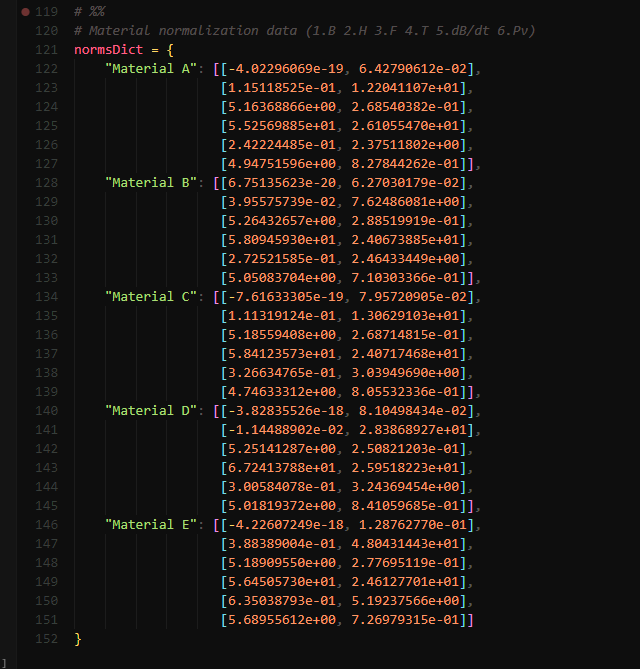

### 練習資料預處理

In [8]:
# import numpy as np
# import pandas as pd
# import matplotlib.pyplot as plt

# # Define material and file paths
# Material = "Material D"
# base_path = "./Data/Training/{Material}/"

# file_templates = {
#     "B_Field": "B_Field.csv",
#     "Frequency": "Frequency.csv",
#     "Temperature": "Temperature.csv",
#     "H_Field": "H_Field.csv",
#     "Volumetric_Loss": "Volumetric_Loss.csv"
# }

# # Generate file paths dynamically
# file_paths = {
#     key: base_path.format(Material=Material) + value
#     for key, value in file_templates.items()
# }

# # Load data
# data_B = pd.read_csv(file_paths["B_Field"], header=None).to_numpy()  # N x 1024
# F_data = pd.read_csv(file_paths["Frequency"], header=None).to_numpy()  # N x 1
# T_data = pd.read_csv(file_paths["Temperature"],
#                      header=None).to_numpy()  # N x 1
# H_data = pd.read_csv(file_paths["H_Field"], header=None).to_numpy()  # N x 1024
# P_data = pd.read_csv(file_paths["Volumetric_Loss"],
#                      header=None).to_numpy()  # N x 1

# # Data pre-process
# # Step 1: Down-sample to 128 points
# seq_length = 128
# cols = np.arange(0, 1024,
#                  int(1024 / seq_length))  # Generate indices for down-sampling
# data_B = data_B[:, cols]

# # Step 2: Select a random row for demonstration
# random_row_index = np.random.randint(data_B.shape[0])
# random_B = data_B[random_row_index, :]

# # Step 3:  Add extra points for initial magnetization calculation
# n_init = 16
# data_length = seq_length + n_init
# random_B_initial = np.hstack((random_B, random_B[:n_init]))

# plt.figure(figsize=(10, 6))
# plt.plot(random_B, marker='o', label=f"Original Row {random_row_index}")
# plt.plot(range(len(random_B), len(random_B_initial)),
#          random_B[:n_init],
#          marker='x',
#          label="Added Initial Points")
# plt.title("Randomly Selected B Field Row with Initial Magnetization Points")
# plt.xlabel("Index")
# plt.ylabel("B Field Value")
# plt.legend()
# plt.grid(True)
# plt.show()

# # Debug output
# print("Randomly selected data_B row (index: {}):".format(random_row_index))
# print(random_B)
# print("Down-sampled data_B shape:", data_B.shape)

# # Step 4:
# B = torch.from_numpy(random_B_initial).view(-1, data_length).float()
# F = torch.log10(torch.from_numpy(F_data).view(-1, 1).float())
# T = torch.from_numpy(T_data).view(-1, 1).float()

# # Norms for data normalization
# normsDict = {
#     "Material A": [[-4.02296069e-19, 6.42790612e-02],
#                    [1.15118525e-01, 1.22041107e+01],
#                    [5.16368866e+00, 2.68540382e-01],
#                    [5.52569885e+01, 2.61055470e+01],
#                    [2.42224485e-01, 2.37511802e+00],
#                    [4.94751596e+00, 8.27844262e-01]],
#     "Material B": [[6.75135623e-20, 6.27030179e-02],
#                    [3.95575739e-02, 7.62486081e+00],
#                    [5.26432657e+00, 2.88519919e-01],
#                    [5.80945930e+01, 2.40673885e+01],
#                    [2.72521585e-01, 2.46433449e+00],
#                    [5.05083704e+00, 7.10303366e-01]],
#     "Material C": [[-7.61633305e-19, 7.95720905e-02],
#                    [1.11319124e-01, 1.30629103e+01],
#                    [5.18559408e+00, 2.68714815e-01],
#                    [5.84123573e+01, 2.40717468e+01],
#                    [3.26634765e-01, 3.03949690e+00],
#                    [4.74633312e+00, 8.05532336e-01]],
#     "Material D": [[-3.82835526e-18, 8.10498434e-02],
#                    [-1.14488902e-02, 2.83868927e+01],
#                    [5.25141287e+00, 2.50821203e-01],
#                    [6.72413788e+01, 2.59518223e+01],
#                    [3.00584078e-01, 3.24369454e+00],
#                    [5.01819372e+00, 8.41059685e-01]],
#     "Material E": [[-4.22607249e-18, 1.28762770e-01],
#                    [3.88389004e-01, 4.80431443e+01],
#                    [5.18909550e+00, 2.77695119e-01],
#                    [5.64505730e+01, 2.46127701e+01],
#                    [6.35038793e-01, 5.19237566e+00],
#                    [5.68955612e+00, 7.26979315e-01]]
# }

# norm = normsDict[Material]

# # Step 5: Data Normalization
# in_B = (B - norm[0][0]) / norm[0][1]
# in_T = (T - norm[3][0]) / norm[3][1]
# in_F = (F - norm[2][0]) / norm[2][1]

# print(in_B)
# print(in_T)
# print(in_F)


In [9]:
# import numpy as np
# import pandas as pd
# import matplotlib.pyplot as plt
# import torch

# # Define material and file paths
# Material = "Material C"
# base_path = "./Data/Training/{Material}/"

# file_templates = {
#     "B_Field": "B_Field.csv",
#     "Frequency": "Frequency.csv",
#     "Temperature": "Temperature.csv",
#     "H_Field": "H_Field.csv",
#     "Volumetric_Loss": "Volumetric_Loss.csv"
# }

# # Generate file paths dynamically
# file_paths = {
#     key: base_path.format(Material=Material) + value
#     for key, value in file_templates.items()
# }

# # Load data
# data_B = pd.read_csv(file_paths["B_Field"], header=None).to_numpy()  # N x 1024
# F_data = pd.read_csv(file_paths["Frequency"], header=None).to_numpy()  # N x 1
# T_data = pd.read_csv(file_paths["Temperature"],
#                      header=None).to_numpy()  # N x 1

# # Data pre-process
# # Step 1: Down-sample to 128 points
# seq_length = 128
# cols = np.arange(0, 1024,
#                  int(1024 / seq_length))  # Generate indices for down-sampling
# data_B = data_B[:, cols]

# # Step 2: Select a random row for demonstration
# random_row_index = np.random.randint(data_B.shape[0])
# random_B = data_B[random_row_index, :]

# # Step 3: Calculate \Delta B (Flux Density Change)
# delta_B = np.diff(
#     random_B,
#     prepend=random_B[0])  # Prepend the first value to maintain length

# # Visualization of Original B and \Delta B
# plt.figure(figsize=(12, 6))
# plt.plot(random_B, marker='o', label=f"Original B (Row {random_row_index})")
# plt.plot(delta_B,
#          marker='x',
#          linestyle='--',
#          label="$\\Delta B$ (Flux Density Change)")
# plt.title("Comparison of Original B and $\\Delta B$")
# plt.xlabel("Index")
# plt.ylabel("Value")
# plt.legend()
# plt.grid(True)
# plt.show()

# # Debug output
# print("Randomly selected data_B row (index: {}):".format(random_row_index))
# print(random_B)
# print("Delta B (calculated from random_B):")
# print(delta_B)

# # Step 4: Optional - Prepare B and \Delta B for further processing
# # Add extra points for initial magnetization calculation
# n_init = 16
# data_length = seq_length + n_init
# random_B_initial = np.hstack((random_B, random_B[:n_init]))
# delta_B_initial = np.hstack((delta_B, delta_B[:n_init]))

# # Convert to PyTorch tensors
# B = torch.from_numpy(random_B_initial).view(-1, data_length).float()
# dB = torch.from_numpy(delta_B_initial).view(-1, data_length).float()

# print("Prepared B tensor:", B)
# print("Prepared \u0394B tensor:", dB)


### 驗證train

In [10]:
%reset -f

import numpy as np
import pandas as pd
import torch
from torch.utils.data import DataLoader

In [11]:
# %%
# Material normalization data (1.B 2.H 3.F 4.T 5.dB/dt 6.Pv)
normsDict = {
    "Material A": [[-4.02296069e-19, 6.42790612e-02],
                   [1.15118525e-01, 1.22041107e+01],
                   [5.16368866e+00, 2.68540382e-01],
                   [5.52569885e+01, 2.61055470e+01],
                   [2.42224485e-01, 2.37511802e+00],
                   [4.94751596e+00, 8.27844262e-01]],
    "Material B": [[6.75135623e-20, 6.27030179e-02],
                   [3.95575739e-02, 7.62486081e+00],
                   [5.26432657e+00, 2.88519919e-01],
                   [5.80945930e+01, 2.40673885e+01],
                   [2.72521585e-01, 2.46433449e+00],
                   [5.05083704e+00, 7.10303366e-01]],
    "Material C": [[-7.61633305e-19, 7.95720905e-02],
                   [1.11319124e-01, 1.30629103e+01],
                   [5.18559408e+00, 2.68714815e-01],
                   [5.84123573e+01, 2.40717468e+01],
                   [3.26634765e-01, 3.03949690e+00],
                   [4.74633312e+00, 8.05532336e-01]],
    "Material D": [[-3.82835526e-18, 8.10498434e-02],
                   [-1.14488902e-02, 2.83868927e+01],
                   [5.25141287e+00, 2.50821203e-01],
                   [6.72413788e+01, 2.59518223e+01],
                   [3.00584078e-01, 3.24369454e+00],
                   [5.01819372e+00, 8.41059685e-01]],
    "Material E": [[-4.22607249e-18, 1.28762770e-01],
                   [3.88389004e-01, 4.80431443e+01],
                   [5.18909550e+00, 2.77695119e-01],
                   [5.64505730e+01, 2.46127701e+01],
                   [6.35038793e-01, 5.19237566e+00],
                   [5.68955612e+00, 7.26979315e-01]]
}


# %% Load Dataset
def load_dataset(material, base_path="./Data/Training/"):
    """
    Load B, F, T, H, and Pcv data for a specific material.

    Parameters
    ----------
    material : str
        Name of the material (e.g., "Material A").
    base_path : str
        Base directory containing the dataset.

    Returns
    -------
    data_B, data_F, data_T, data_H, data_Pcv : np.array
        Loaded datasets for the specified material.
    """
    in_file1 = f"{base_path}{material}/B_Field.csv"
    in_file2 = f"{base_path}{material}/Frequency.csv"
    in_file3 = f"{base_path}{material}/Temperature.csv"
    in_file4 = f"{base_path}{material}/H_Field.csv"
    in_file5 = f"{base_path}{material}/Volumetric_Loss.csv"

    data_B = np.genfromtxt(in_file1, delimiter=',')  # N by 1024
    data_F = np.genfromtxt(in_file2, delimiter=',')  # N by 1
    data_T = np.genfromtxt(in_file3, delimiter=',')  # N by 1
    data_H = np.genfromtxt(in_file4, delimiter=',')  # N by 1024
    data_Pcv = np.genfromtxt(in_file5, delimiter=',')  # N by 1

    return data_B, data_F, data_T, data_H, data_Pcv


In [12]:
# %% Preprocess data into a data loader
def get_dataloader(data_B,
                   data_F,
                   data_T,
                   data_H,
                   data_Pcv,
                   norm,
                   n_init=16):  #*(Date:241216)
    """
    Process data and return DataLoader for training, validation, and testing.

    Parameters
    ----------
    data_B : np.array
        Magnetic flux density data.
    data_F : np.array
        Frequency data.
    data_T : np.array
        Temperature data.
    data_H : np.array
        Magnetic field strength data.
    data_Pcv : np.array
        Core loss data.
    norm : list
        Normalization parameters for the features.
    n_init : int
        Number of initial data points for magnetization.

    Returns
    -------
    train_loader, valid_loader, test_loader : DataLoader
        Dataloaders for training, validation, and testing sets.
    """
    # Data pre-process
    # 1. Down-sample to 128 points
    seq_length = 128
    cols = range(0, 1024, int(1024 / seq_length))  #range(start, stop, step)
    data_B = data_B[:, cols]
    data_H = data_H[:, cols]  #*  Add H Down-sample to 128 points (Date:241213)

    # 2. Add extra points for initial magnetization calculation
    #? n_init是加初始資料點16筆，是否H需要correct(先寫)
    data_length = seq_length + n_init
    data_B = np.hstack((data_B, data_B[:, :n_init]))
    data_H = np.hstack((data_H, data_H[:, :n_init]))  #*(Date:241216)

    # 3. Format data into tensors
    B = torch.from_numpy(data_B).view(-1, data_length, 1).float()
    H = torch.from_numpy(data_H).view(-1, data_length,
                                      1).float()  #*(Date:241216)
    F = torch.log10(torch.from_numpy(data_F).view(-1, 1).float())
    T = torch.from_numpy(data_T).view(-1, 1).float()
    Pcv = torch.log10(torch.from_numpy(data_Pcv).view(
        -1, 1).float())  #*增加 Pcv，並使用log

    # 4. Data Normalization
    in_B = (B - norm[0][0]) / norm[0][1]
    in_H = (H - norm[1][0]) / norm[1][1]  #*增加 H Standardization(Date:250103)
    in_T = (T - norm[3][0]) / norm[3][1]
    in_F = (F - norm[2][0]) / norm[2][1]
    in_Pcv = (Pcv -
              norm[5][0]) / norm[5][1]  #*增加 Pcv Standardization(Date:250103)

    # 5. Extra features
    dB = torch.diff(B, dim=1)
    dB = torch.cat((dB[:, 0:1], dB), dim=1)  #微分少初始值，補上初始值
    dB_dt = dB * (seq_length * F.view(-1, 1, 1))  #這裡的公式表示 dB/t = Δ𝐵 x F

    in_dB = torch.diff(B, dim=1)  # Flux density change
    in_dB = torch.cat((in_dB[:, 0:1], in_dB), dim=1)

    in_dB_dt = (dB_dt - norm[4][0]) / norm[4][1]  # Flux density change rate

    max_B, _ = torch.max(in_B, dim=1)
    min_B, _ = torch.min(in_B, dim=1)

    s0 = get_operator_init(in_B[:, 0] - in_dB[:, 0], in_dB, max_B,
                           min_B)  # Operator inital state

    # 6. Create dataloader to speed up data processing
    #*分成train valid test(Date:250103)

    full_dataset = torch.utils.data.TensorDataset(
        torch.cat((in_B, in_dB, in_dB_dt, in_H), dim=2),  # B-related features
        torch.cat((in_F, in_T, in_Pcv), dim=1),  # Additional features
        s0)

    # Split dataset into train, validation, and test sets (60:20:20)
    train_size = int(0.6 * len(full_dataset))
    valid_size = int(0.2 * len(full_dataset))
    test_size = len(full_dataset) - train_size - valid_size

    train_dataset, valid_dataset, test_dataset = torch.utils.data.random_split(
        full_dataset,
        [train_size, valid_size, test_size],
        generator=torch.Generator().manual_seed(42)  # For reproducibility
    )

    kwargs = {
        'num_workers': 4,
        'batch_size': 128,
        'pin_memory': True,
        'pin_memory_device': "cuda" if torch.cuda.is_available() else "cpu",
        'drop_last': False
    }

    train_loader = torch.utils.data.DataLoader(train_dataset, **kwargs)
    valid_loader = torch.utils.data.DataLoader(valid_dataset, **kwargs)
    test_loader = torch.utils.data.DataLoader(test_dataset, **kwargs)

    return test_loader


# %% Predict the operator state at t0
def get_operator_init(B1, dB, Bmax, Bmin, max_out_H=5, operator_size=30):
    """Compute the inital state of hysteresis operators

    Parameters
    ---------
    B1 : torch_like (batch)
         Stop operator excitation at t1
    dB : torch_like (batch, data_length)
         Flux density changes at each t
    Bmax/Bmin : torch_like (batch)
         Max/Min flux density of each cycle 
    """
    # 1. Parameter setting
    s0 = torch.zeros((dB.shape[0], operator_size))  # Allocate cache for s0
    operator_thre = torch.from_numpy(
        np.linspace(max_out_H / operator_size, max_out_H,
                    operator_size)).view(1,
                                         -1)  # hysteresis operators' threshold

    # 2. Iterate each excitation for the operator inital state computation
    for i in range(dB.shape[0]):
        for j in range(operator_size):
            r = operator_thre[0, j]
            if (Bmax[i] >= r) or (Bmin[i] <= -r):
                if dB[i, 0] >= 0:
                    if B1[i] > Bmin[i] + 2 * r:
                        s0[i, j] = r
                    else:
                        s0[i, j] = B1[i] - (r + Bmin[i])
                else:
                    if B1[i] < Bmax[i] - 2 * r:
                        s0[i, j] = -r
                    else:
                        s0[i, j] = B1[i] + (r - Bmax[i])

    return s0


In [13]:
def main():

    # %% 使用指定材料的標準化數據與資料
    material = "Material A"
    data_B, data_F, data_T, data_H, data_Pcv = load_dataset(material)

    # 對應標準化參數
    norm = normsDict[material]

    # 生成 DataLoader
    train_loader, valid_loader, test_loader = get_dataloader(
        data_B, data_F, data_T, data_H, data_Pcv, norm)

    # %% 驗證 DataLoader
    for batch in train_loader:
        input_features, additional_features = batch
        print("Input features shape:", input_features.shape)
        print("Additional features shape:", additional_features.shape)
        break


if __name__ == "__main__":
    main()

AttributeError: module '__main__' has no attribute '__spec__'

In [ ]:
# import torch
# from packaging import version

# kwargs = {
#     'num_workers': 4,
#     'batch_size': 128,
#     'pin_memory': True,
#     'drop_last': False,
# }

# # 添加 pin_memory_device 如果 PyTorch 版本支持
# if version.parse(torch.__version__) >= version.parse("1.12.0"):
#     kwargs['pin_memory_device'] = "cuda" if torch.cuda.is_available() else "cpu"